Credit Card Fraud Detection using Logistic Regression

In [ ]:
#importing the Dependencies

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
# Loading the dataset to a pandas dataframe
creditCardData = pd.read_csv('/content/creditcard.csv')
creditCardData.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
creditCardData.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
15931,27369,-1.160116,-0.244177,0.744250,-0.192350,1.156356,-1.931383,0.409670,-0.364716,-0.516156,...,-0.021714,0.012447,-0.360625,0.514926,0.064194,1.026317,-0.030845,-0.083609,52.90,0.0
15932,27369,-3.058318,3.099206,-4.932555,1.924138,-1.576032,-2.135383,-0.830098,2.228617,-0.312343,...,-0.111526,-0.485223,-0.003945,0.049422,-0.173962,-0.379260,0.171872,-0.236166,99.99,0.0
15933,27369,-0.661806,0.315385,2.011194,-0.438757,-0.554990,-0.668072,0.424651,0.079141,0.126057,...,0.148063,0.177511,0.134794,0.359931,-0.544428,0.181545,0.068546,0.153438,74.58,0.0
15934,27370,1.525348,-1.231442,0.420095,-1.551218,-1.376006,0.100758,-1.455755,0.134876,-1.319056,...,-0.108619,0.084883,-0.051758,-0.815038,0.331989,-0.015837,0.058942,0.011087,6.00,0.0
15935,27371,1.385680,-0.590076,-0.569197,-0.939441,-0.196015,-0.486685,-0.102496,-0.237930,-0.928028,...,-0.255944,-1.055682,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#dataset informations
creditCardData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15936 entries, 0 to 15935
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    15936 non-null  int64  
 1   V1      15936 non-null  float64
 2   V2      15936 non-null  float64
 3   V3      15936 non-null  float64
 4   V4      15936 non-null  float64
 5   V5      15936 non-null  float64
 6   V6      15936 non-null  float64
 7   V7      15936 non-null  float64
 8   V8      15936 non-null  float64
 9   V9      15936 non-null  float64
 10  V10     15936 non-null  float64
 11  V11     15936 non-null  float64
 12  V12     15936 non-null  float64
 13  V13     15936 non-null  float64
 14  V14     15936 non-null  float64
 15  V15     15936 non-null  float64
 16  V16     15936 non-null  float64
 17  V17     15936 non-null  float64
 18  V18     15936 non-null  float64
 19  V19     15936 non-null  float64
 20  V20     15936 non-null  float64
 21  V21     15936 non-null  float64
 22

In [ ]:
#Checking the number of missing values in each column
creditCardData.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


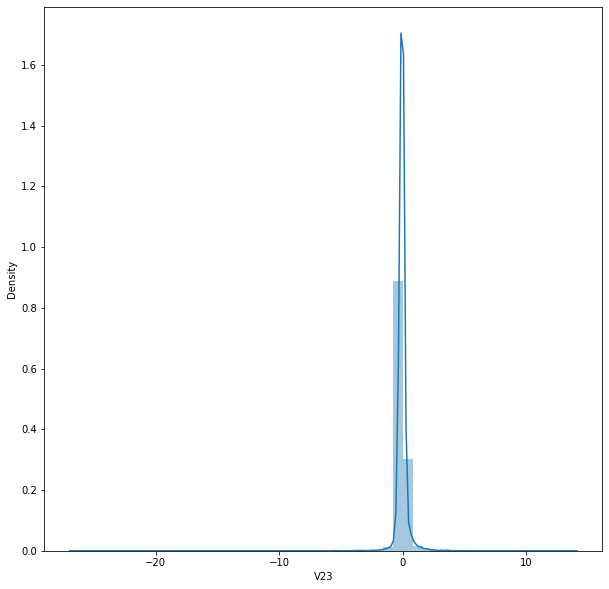

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig , ax = plt.subplots(figsize=(10,10))
sns.distplot(creditCardData.V23)

In [ ]:
#Replace the missing vale with Mean value
creditCardData['Class'].fillna(creditCardData['Class'].mean(), inplace = True)

In [ ]:
# Distribution of Ligit Transactions & Fraudulent Transaction
creditCardData['Class'].value_counts()

0.000000    15862
1.000000       73
0.004581        1
Name: Class, dtype: int64

0 ---> Normal Transaction
1 ---> Fraudulent Transaction
**Our dataset is hightly unbalanced**

In [ ]:
#separate the data for analysis
legit = creditCardData[creditCardData.Class == 0]
fraud = creditCardData[creditCardData.Class == 1]
print(legit.shape)
print(fraud.shape)

(15862, 31)
(73, 31)


In [ ]:
#Statistical measure of the data
legit.Amount.describe()

count    15862.000000
mean        66.280151
std        188.898885
min          0.000000
25%          5.522500
50%         15.950000
75%         53.890000
max       7712.430000
Name: Amount, dtype: float64

In [ ]:
fraud.Amount.describe()

count      73.000000
mean       90.307123
std       271.634360
min         0.000000
25%         1.000000
50%         1.000000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

In [ ]:
#Compare the values for both transactions
creditCardData.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.000000,12104.432165,-0.219072,0.250000,0.862854,0.272641,-0.105868,0.124522,-0.112681,-0.016178,0.879120,...,0.028173,-0.064056,-0.161585,-0.035040,0.013076,0.117023,0.037111,0.011206,0.005907,66.280151
0.004581,27371.000000,1.385680,-0.590076,-0.569197,-0.939441,-0.196015,-0.486685,-0.102496,-0.237930,-0.928028,...,0.234881,-0.255944,-1.055682,-0.036524,0.011509,0.117477,0.037900,0.015402,0.006161,66.390222
1.000000,15559.643836,-7.929807,6.193120,-11.997831,6.555050,-5.474984,-2.480356,-8.354317,3.668478,-3.086988,...,0.671905,0.441100,-0.295856,-0.358994,-0.328925,0.216076,0.209323,0.927187,0.061380,90.307123


Under Sampling

Build sample dataset containing similar distribution of normal transactions and fraudulent transactions

In [ ]:
legit_sample = legit.sample(n=73)

In [ ]:
#Concatenting two dataframes
new_dataset = pd.concat([legit_sample,fraud], axis=0)

In [ ]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
13209,23252,1.403203,-0.820555,-0.842639,-1.293821,1.318448,3.656002,-1.297477,0.791648,0.837620,...,-0.695334,-1.223515,0.011593,0.990676,0.432038,1.030184,-0.063126,-0.004765,15.95,0.0
8847,12101,1.214134,-0.126762,0.685152,0.285627,-0.665364,-0.397531,-0.400028,-0.057880,1.832680,...,-0.213877,-0.173225,-0.061312,0.364836,0.382859,1.056226,-0.099258,-0.016464,9.80,0.0
13744,24375,1.278303,-0.787643,-1.466128,-1.561126,1.725751,3.040497,-0.670727,0.557801,0.060464,...,-0.341555,-1.272446,0.009119,0.917566,0.444838,-0.564783,-0.060986,0.020117,121.00,0.0
8197,11049,1.302043,-0.261503,-0.722756,-0.853728,1.700463,3.426329,-1.013726,0.793970,1.596136,...,-0.119160,-0.231570,-0.051550,1.022013,0.368303,1.046159,-0.086748,-0.000809,15.95,0.0
13385,23642,-1.198766,-3.088928,-1.003308,3.712511,-0.913999,-0.079777,2.020245,-0.558136,0.077140,...,0.623987,-0.729419,-1.100585,0.397623,0.136963,-0.090517,-0.281533,0.216404,1227.14,0.0


In [ ]:
new_dataset['Class'].value_counts()

0.0    73
1.0    73
Name: Class, dtype: int64

In [ ]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,12524.424658,0.188111,-0.016102,0.730025,0.063318,-0.113868,0.437991,-0.048905,-0.026343,0.850514,...,0.031925,-0.074618,-0.209188,-0.015875,0.002843,0.082498,0.063908,0.020643,-0.006312,98.747397
1.0,15559.643836,-7.929807,6.193120,-11.997831,6.555050,-5.474984,-2.480356,-8.354317,3.668478,-3.086988,...,0.671905,0.441100,-0.295856,-0.358994,-0.328925,0.216076,0.209323,0.927187,0.061380,90.307123


In [ ]:
#Split the data into Feature and Target
X = new_dataset.drop(columns = 'Class', axis=1)
y = new_dataset['Class']
print(X)
print(y)

In [ ]:
#Split Data into Training Data & Test Data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(146, 30) (116, 30) (30, 30)


In [ ]:
model = LogisticRegression()

#training the logistic regression model with traininig data
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [ ]:
print("Training Data Accuracy Score:",training_data_accuracy)

Training Data Accuracy Score: 0.9913793103448276


In [ ]:
test_data_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(test_data_prediction, y_test)
print("Test data accuracy score", test_data_accuracy)

Test data accuracy score 0.9666666666666667
